# Team 1 - Chocolate Bar

![](https://img.newatlas.com/cocoa-tree-domestication-chocolate-1.jpg?auto=format%2Ccompress&ch=Width%2CDPR&fit=crop&h=347&q=60&rect=0%2C18%2C1620%2C911&w=616&s=2c0f902d21b734d77c99fd13171fb979)

_For more information about the dataset, read [here](https://www.kaggle.com/rtatman/chocolate-bar-ratings)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of poorly labeled data in `Broad Bean Origin` column.
- There are some rows in `Broad Bean Origin` with multiple values, those values will create errors in our data. 
- How can we get rid of the `%` sign in `Cocoa Percent` column?
- And more...

In [1]:
# Start your codes here!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Metricc for Success**
- Where are the best cocoa beans grown?
- Which countries produce the highest-rated bars?
- What’s the relationship between cocoa solids percentage and rating?

## 1. Checking the data

In [2]:
choco_df = pd.read_csv('../data/01-chocolate-bar/chocolate.csv')
choco_df.sample(5)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
507,DAR,"Venezuela, batch 122",1920,2016,72%,U.S.A.,2.75,,Venezuela
344,Caoni (Tulicorp),Esmeraldas,269,2008,55%,Ecuador,3.50,Forastero (Arriba),Ecuador
164,Beehive,"Ecuador, Batch 31516",1784,2016,70%,U.S.A.,2.75,,Ecuador
330,C-Amaro,Ecuador,1185,2013,100%,Italy,3.50,,Ecuador
222,Bonnat,Kaori,1339,2014,75%,France,4.00,,Brazil


In [3]:
choco_df.columns.to_list()

['Company\xa0\n(Maker-if known)',
 'Specific Bean Origin\nor Bar Name',
 'REF',
 'Review\nDate',
 'Cocoa\nPercent',
 'Company\nLocation',
 'Rating',
 'Bean\nType',
 'Broad Bean\nOrigin']

In [4]:
choco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [5]:
choco_df.describe()

,REF,Review Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


From here, the average rating is aroung 3.186

## 2. Cleaning the data


First, check is there are any null value

In [6]:
choco_df.isna().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

Great, just 1 row, let's check it out

In [7]:
choco_df[choco_df['Bean\nType'].isna()]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


Because there is only one row, I think we can remove this line for the sake of simplicity

In [8]:
# Remove it
choco_df = choco_df[choco_df['Bean\nType'].isnull() == False]

# Check again
choco_df[choco_df['Bean\nType'].isna()]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin


Another Check if any value belongs to Rating is < 0

In [9]:
choco_df[choco_df['Rating'] < 0]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin


Remove the % in `Cocoa Percent` and convert to type float

In [10]:
def formatPercent(inputstring):
    return float(inputstring[:inputstring.find('%')])
formatPercent('38%')

38.0

Apply this function to column `Cocoa Percent`

In [11]:
choco_df['Cocoa\nPercent'] =choco_df['Cocoa\nPercent'].apply(lambda x: formatPercent(x))

In [12]:
choco_df.head(5)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


Next, let's take a look at `Broad Bean Origin`

In [13]:
choco_df['Broad Bean\nOrigin'].sample(10)

588              Nicaragua
1203                  Peru
231                  Haiti
847               Sao Tome
1390             Venezuela
657             Madagascar
1180    Dominican Republic
1081    Dominican Republic
191              Nicaragua
1625                      
Name: Broad Bean\nOrigin, dtype: object

It seems that `Broad Bean Origin` is the country where cocoa is made. Let's get a list of these countries

In [14]:
list(choco_df['Broad Bean\nOrigin'].unique())

['Sao Tome',
 'Togo',
 'Peru',
 'Venezuela',
 'Cuba',
 'Panama',
 'Madagascar',
 'Brazil',
 'Ecuador',
 'Colombia',
 'Burma',
 'Papua New Guinea',
 'Bolivia',
 'Fiji',
 'Mexico',
 'Indonesia',
 'Trinidad',
 'Vietnam',
 'Nicaragua',
 'Tanzania',
 'Dominican Republic',
 'Ghana',
 'Belize',
 '\xa0',
 'Jamaica',
 'Grenada',
 'Guatemala',
 'Honduras',
 'Costa Rica',
 'Domincan Republic',
 'Haiti',
 'Congo',
 'Philippines',
 'Malaysia',
 'Dominican Rep., Bali',
 'Venez,Africa,Brasil,Peru,Mex',
 'Gabon',
 'Ivory Coast',
 'Carribean',
 'Sri Lanka',
 'Puerto Rico',
 'Uganda',
 'Martinique',
 'Sao Tome & Principe',
 'Vanuatu',
 'Australia',
 'Liberia',
 'Ecuador, Costa Rica',
 'West Africa',
 'Hawaii',
 'St. Lucia',
 'Cost Rica, Ven',
 'Peru, Madagascar',
 'Venezuela, Trinidad',
 'Trinidad, Tobago',
 'Ven, Trinidad, Ecuador',
 'South America, Africa',
 'India',
 'Africa, Carribean, C. Am.',
 'Tobago',
 'Ven., Indonesia, Ecuad.',
 'Trinidad-Tobago',
 'Peru, Ecuador, Venezuela',
 'Venezuela, Dom. 

It seems fine... Except for some cases where there are multiple Orgins. Let's find all the cases where there are more than one origin

In [15]:
import re

def isMultipleOrigin(inputstring):
    # This function aims to return the number of contry in one string 
    
    # Explain regular expression
    # This expression return a match if the string is 
    # A comma follow by zero or not character that are not comma or new line
    # ^: at the start
    # [^,\n]*: mactch any character that are not comma or new line
    # (* : Zero or more occurrences) (+ : One or more occurrences)
    # (,[^,\n]*): match a comma follow by zero or more character that are not comma or new line 
    matchList = re.findall("(,[^,\n]*)", inputstring)
    
    return len(matchList) + 1

Let's have some test

In [16]:
inputString = 'Venez,Africa,Brasil,Peru,Mex'
isMultipleOrigin(inputString)

5

In [17]:
inputString = 'Africa, Carribean, C. Am.'
isMultipleOrigin(inputString)

3

- The aim when i create this function is to split one row into N rows, where N is the number of Origin Country.
- But before we can use this function to split row, let's inspect some weird countries that appeared in above list

### Various Name for One country + Typo + & character + weird name
- Here i use set to sort these strings alphabetically

In [18]:
set(choco_df['Broad Bean\nOrigin'].unique())

{'Africa, Carribean, C. Am.',
 'Australia',
 'Belize',
 'Bolivia',
 'Brazil',
 'Burma',
 'Cameroon',
 'Carribean',
 'Carribean(DR/Jam/Tri)',
 'Central and S. America',
 'Colombia',
 'Colombia, Ecuador',
 'Congo',
 'Cost Rica, Ven',
 'Costa Rica',
 'Cuba',
 'DR, Ecuador, Peru',
 'Dom. Rep., Madagascar',
 'Domincan Republic',
 'Dominican Rep., Bali',
 'Dominican Republic',
 'Ecuador',
 'Ecuador, Costa Rica',
 'Ecuador, Mad., PNG',
 'El Salvador',
 'Fiji',
 'Gabon',
 'Ghana',
 'Ghana & Madagascar',
 'Ghana, Domin. Rep',
 'Ghana, Panama, Ecuador',
 'Gre., PNG, Haw., Haiti, Mad',
 'Grenada',
 'Guat., D.R., Peru, Mad., PNG',
 'Guatemala',
 'Haiti',
 'Hawaii',
 'Honduras',
 'India',
 'Indonesia',
 'Indonesia, Ghana',
 'Ivory Coast',
 'Jamaica',
 'Liberia',
 'Mad., Java, PNG',
 'Madagascar',
 'Madagascar & Ecuador',
 'Malaysia',
 'Martinique',
 'Mexico',
 'Nicaragua',
 'Nigeria',
 'PNG, Vanuatu, Mad',
 'Panama',
 'Papua New Guinea',
 'Peru',
 'Peru(SMartin,Pangoa,nacional)',
 'Peru, Belize',
 

Let's note some weird stuff going on here
- Carribean / Carribean(DR/Jam/Tri)
- Venezuela, Ven, Ven.
- Dom. Rep. , Domincan Republic (_typo_), Dominician Republic, Dominician Rep., Domin. Rep, D.R.
- Madagascar, Mad., Mad
- Ghana & Madagascar, Madagascar & Ecuador, Sao Tome & Principe(_not separate by comma_)
- Grenada, Gre.
- Guatemala, Guat.
- Peru, Peru(SMartin,Pangoa,nacional)
- Mexico, Mex
- nan
- \xa0

#### Let's do the easiest first: Weird Character
- nan
- \xa0

In [19]:
choco_df[choco_df['Broad Bean\nOrigin'].isnull()]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1072,Mast Brothers,Madagascar,999,2012,72.0,U.S.A.,2.5,Trinitario,NaN


In [20]:
choco_df[choco_df['Broad Bean\nOrigin'] == "\xa0"]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
77,Amedei,Nine,111,2007,75.0,Italy,4.00,Blend,
85,Amedei,Toscano Black,170,2007,63.0,Italy,3.50,Blend,
86,Amedei,Toscano Black,40,2006,70.0,Italy,5.00,Blend,
87,Amedei,Toscano Black,75,2006,66.0,Italy,4.00,Blend,
144,Bahen & Co.,Houseblend,1474,2015,80.0,Australia,3.25,,
148,Bahen & Co.,Houseblend,999,2012,70.0,Australia,2.50,Blend,
182,Bernachon,Nature,797,2012,55.0,France,2.75,,
214,Blanxart,Organic Dark,322,2009,72.0,Spain,2.75,,
245,Bonnat,One Hundred,81,2006,100.0,France,1.50,,
277,Burnt Fork Bend,Blend,1303,2014,72.0,U.S.A.,3.25,Blend,


There are about 4% row that has empty value in Broad bean Origin. I will asign all the row with null/empty value to `Others`

In [21]:
choco_df["Broad Bean\nOrigin"][choco_df['Broad Bean\nOrigin'].isnull()] = "Others"

/home/ngochieu642/.virtualenvs/dataScience/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
choco_df[choco_df['Broad Bean\nOrigin'] == "\xa0"]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
77,Amedei,Nine,111,2007,75.0,Italy,4.00,Blend,
85,Amedei,Toscano Black,170,2007,63.0,Italy,3.50,Blend,
86,Amedei,Toscano Black,40,2006,70.0,Italy,5.00,Blend,
87,Amedei,Toscano Black,75,2006,66.0,Italy,4.00,Blend,
144,Bahen & Co.,Houseblend,1474,2015,80.0,Australia,3.25,,
148,Bahen & Co.,Houseblend,999,2012,70.0,Australia,2.50,Blend,
182,Bernachon,Nature,797,2012,55.0,France,2.75,,
214,Blanxart,Organic Dark,322,2009,72.0,Spain,2.75,,
245,Bonnat,One Hundred,81,2006,100.0,France,1.50,,
277,Burnt Fork Bend,Blend,1303,2014,72.0,U.S.A.,3.25,Blend,


In [23]:
def replaceEmpty(x):
    return "Others" if (x=="\xa0") else x

In [24]:
choco_df['Broad Bean\nOrigin'] = choco_df['Broad Bean\nOrigin'].apply(lambda x: replaceEmpty(x))

In [25]:
choco_df[choco_df['Broad Bean\nOrigin'].isnull()]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin


In [26]:
choco_df[choco_df['Broad Bean\nOrigin'] == "\xa0"]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin


In [27]:
choco_df[choco_df['Broad Bean\nOrigin'] == "Others"]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
77,Amedei,Nine,111,2007,75.0,Italy,4.00,Blend,Others
85,Amedei,Toscano Black,170,2007,63.0,Italy,3.50,Blend,Others
86,Amedei,Toscano Black,40,2006,70.0,Italy,5.00,Blend,Others
87,Amedei,Toscano Black,75,2006,66.0,Italy,4.00,Blend,Others
144,Bahen & Co.,Houseblend,1474,2015,80.0,Australia,3.25,,Others
148,Bahen & Co.,Houseblend,999,2012,70.0,Australia,2.50,Blend,Others
182,Bernachon,Nature,797,2012,55.0,France,2.75,,Others
214,Blanxart,Organic Dark,322,2009,72.0,Spain,2.75,,Others
245,Bonnat,One Hundred,81,2006,100.0,France,1.50,,Others
277,Burnt Fork Bend,Blend,1303,2014,72.0,U.S.A.,3.25,Blend,Others


Great, now let's move on to the the next Probelm
#### '&' character or '-' character
Some input was faulty, but thers is one country has '&' in their name, which is Trinidad & Tobago. However, they are two quite separate island, so if we separate Triniad & Tobago into `Trinidad` and `Tobago`, geographically, this wouldn't be a problem  

In [28]:
def hasSpecial(inputstring):
    return True if "&" in inputstring else False

def replaceWithComma(inputstring):
    inputstring = inputstring.replace("&",",")
    inputstring = inputstring.replace("-",",")
    
    return inputstring

In [29]:
choco_df['Broad Bean\nOrigin'] = choco_df['Broad Bean\nOrigin'].apply(lambda x: replaceWithComma(x))

Let's exam the unique name in `Braod Bean Origin` again

In [30]:
set(choco_df['Broad Bean\nOrigin'].unique())

{'Africa, Carribean, C. Am.',
 'Australia',
 'Belize',
 'Bolivia',
 'Brazil',
 'Burma',
 'Cameroon',
 'Carribean',
 'Carribean(DR/Jam/Tri)',
 'Central and S. America',
 'Colombia',
 'Colombia, Ecuador',
 'Congo',
 'Cost Rica, Ven',
 'Costa Rica',
 'Cuba',
 'DR, Ecuador, Peru',
 'Dom. Rep., Madagascar',
 'Domincan Republic',
 'Dominican Rep., Bali',
 'Dominican Republic',
 'Ecuador',
 'Ecuador, Costa Rica',
 'Ecuador, Mad., PNG',
 'El Salvador',
 'Fiji',
 'Gabon',
 'Ghana',
 'Ghana , Madagascar',
 'Ghana, Domin. Rep',
 'Ghana, Panama, Ecuador',
 'Gre., PNG, Haw., Haiti, Mad',
 'Grenada',
 'Guat., D.R., Peru, Mad., PNG',
 'Guatemala',
 'Haiti',
 'Hawaii',
 'Honduras',
 'India',
 'Indonesia',
 'Indonesia, Ghana',
 'Ivory Coast',
 'Jamaica',
 'Liberia',
 'Mad., Java, PNG',
 'Madagascar',
 'Madagascar , Ecuador',
 'Malaysia',
 'Martinique',
 'Mexico',
 'Nicaragua',
 'Nigeria',
 'Others',
 'PNG, Vanuatu, Mad',
 'Panama',
 'Papua New Guinea',
 'Peru',
 'Peru(SMartin,Pangoa,nacional)',
 'Peru,

Great, ["&", "nan", "\xa0"] can not be found anymore. But there is still a case of '/': 
- Carribean(DR/Jam/Tri)
- Venezuela/ Ghana

If we Replace / with comma, 3 Citys of Carribean will be considered as countries, which should not be. So the next step, I'm going to try to normalize all the countries name
- Carribean / Carribean(DR/Jam/Tri)
- Venezuela, Venez, Ven, Ven.
- DR, Dom. Rep. , Domincan Republic (_typo_), Dominican Republic, Dominican Rep., Domin. Rep, D.R., Dom. Rep
- Madagascar, Mad., Mad
- Ecuador, Ecuad., Ecu.
- Nicaragua, Nic.
- Ghana & Madagascar, Madagascar & Ecuador, Sao Tome & Principe(_not separate by comma_)
- Grenada, Gre.
- Guatemala, Guat.
- Peru, Peru(SMartin,Pangoa,nacional)
- Mexico, Mex
- nan
- \xa0

In [31]:
countries = {
    "Carribean": ["Carribean(DR/Jam/Tri)"],
    "Venezuela": ["Venez","Ven.", "Ven"],
    "Ecuador":["Ecuad.", "Ecu."],
    "Dominican Republic":["DR","Dom. Rep.","Dom. Rep","Domincan Republic","Dominican Rep.","Domin. Rep", "D.R."],
    "Madagascar": ["Mad.","Mad"],
    "Nicaragua":["Nic."],
    "Grenada": ["Gre."],
    "Guatmela":["Guat."],
    "Peru" : ["Peru(SMartin,Pangoa,nacional)"],
    "Mexico":["Mex"],
    "Papua New Guinea": ["PNG"],
    "Central and S. America": ["C. Am."],
    "Hawaii":"Haw."
}

In [32]:
choco_df[choco_df["Broad Bean\nOrigin"]=="Venezuela/ Ghana"]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1291,Pierre Marcolini,Fleur de Cacao,166,2007,85.0,Belgium,3.5,Blend,Venezuela/ Ghana


#### Drop this Venezuela / Ghana 

In [33]:
choco_df = choco_df[choco_df["Broad Bean\nOrigin"]!="Venezuela/ Ghana"]

In [34]:
choco_df[choco_df["Broad Bean\nOrigin"]=="Venezuela/ Ghana"]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin


#### Drop Peru(SMartin,Pangoa,nacional)
- Becuase we read by comma, let's inspect this

In [35]:
choco_df[choco_df['Broad Bean\nOrigin']=="Peru(SMartin,Pangoa,nacional)"]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1356,Raaka,Amazon Basin Blend,1788,2016,70.0,U.S.A.,3.0,,"Peru(SMartin,Pangoa,nacional)"


In [36]:
choco_df=choco_df[choco_df['Broad Bean\nOrigin']!="Peru(SMartin,Pangoa,nacional)"]

#### Normalize Names

In [37]:
def listContain(item, checkList):
    return item in checkList

def dictContain(item, checkDict):
    count = 0
    for (key, value) in checkDict.items():
        if listContain(item, value):
            count += 1
    return True if count > 0 else False

def getKeyAppend(item, checkDict):
    for (key, value) in checkDict.items():
        if listContain(item, value):
            return key
    return item

In [38]:
def convertName(inputstring, countryDict):
    # This function does not work with Venezuela/ Ghana case.
    countryNameList = inputstring.split(',') 
#     print('Origin Names: ', countryNameList)
    normalizeNameList = []

    for name in countryNameList:
#         print('Name: ', name)
        if name.strip() in list(countryDict.keys()):
            normalizeNameList.append(name.strip())
        else:
            if dictContain(name.strip(), countryDict):
                key = getKeyAppend(name.strip(), countryDict)
                normalizeNameList.append(key.strip())
            else:
                normalizeNameList.append(name.strip())
                
    return normalizeNameList

In [39]:
testSet = set(choco_df['Broad Bean\nOrigin'].unique())

In [40]:
for test in testSet:
    print ("\n\nOrigin: ", test)
    print("Converted: ", convertName(test, countries))



Origin:  Cameroon
Converted:  ['Cameroon']


Origin:  Vanuatu
Converted:  ['Vanuatu']


Origin:  Martinique
Converted:  ['Martinique']


Origin:  Principe
Converted:  ['Principe']


Origin:  Tanzania
Converted:  ['Tanzania']


Origin:  Panama
Converted:  ['Panama']


Origin:  Peru, Ecuador, Venezuela
Converted:  ['Peru', 'Ecuador', 'Venezuela']


Origin:  Mexico
Converted:  ['Mexico']


Origin:  Madagascar
Converted:  ['Madagascar']


Origin:  Papua New Guinea
Converted:  ['Papua New Guinea']


Origin:  Cuba
Converted:  ['Cuba']


Origin:  Ven.,Ecu.,Peru,Nic.
Converted:  ['Venezuela', 'Ecuador', 'Peru', 'Nicaragua']


Origin:  Peru, Ecuador
Converted:  ['Peru', 'Ecuador']


Origin:  Brazil
Converted:  ['Brazil']


Origin:  DR, Ecuador, Peru
Converted:  ['Dominican Republic', 'Ecuador', 'Peru']


Origin:  Peru, Belize
Converted:  ['Peru', 'Belize']


Origin:  Ghana, Panama, Ecuador
Converted:  ['Ghana', 'Panama', 'Ecuador']


Origin:  Haiti
Converted:  ['Haiti']


Origin:  El Salvador

In [41]:
# Loop for each row of the dataset, separate Broad Bin Origin Country
choco_df.values.shape

(1792, 9)

In [42]:
choco_df.values

array([['A. Morin', 'Agua Grande', 1876, ..., 3.75, '\xa0', 'Sao Tome'],
       ['A. Morin', 'Kpime', 1676, ..., 2.75, '\xa0', 'Togo'],
       ['A. Morin', 'Atsane', 1676, ..., 3.0, '\xa0', 'Togo'],
       ...,
       ['Zotter', 'Kerala State', 749, ..., 3.5, 'Forastero', 'India'],
       ['Zotter', 'Kerala State', 781, ..., 3.25, '\xa0', 'India'],
       ['Zotter', 'Brazil, Mitzi Blue', 486, ..., 3.0, '\xa0', 'Brazil']],
      dtype=object)

In [43]:
# Create new data frame to append new data
refactor_df = pd.DataFrame(columns=choco_df.columns.to_list())
refactor_df

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin


In [44]:
for eachRow in choco_df.values:  
    newNameList = convertName(eachRow[8], countries)
    
    for name in newNameList:
        cpname = eachRow[:]
        cpname[8] = name
        temp_df = pd.DataFrame([cpname], columns=choco_df.columns.to_list())
        refactor_df = refactor_df.append(temp_df, ignore_index=True)
refactor_df

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70.0,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70.0,France,4.00,,Peru


In [45]:
set(refactor_df['Broad Bean\nOrigin'].unique())

{'Africa',
 'Australia',
 'Bali',
 'Belize',
 'Bolivia',
 'Brasil',
 'Brazil',
 'Burma',
 'Cameroon',
 'Carribean',
 'Central and S. America',
 'Colombia',
 'Congo',
 'Cost Rica',
 'Costa Rica',
 'Cuba',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Fiji',
 'Gabon',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guatmela',
 'Haiti',
 'Hawaii',
 'Honduras',
 'India',
 'Indonesia',
 'Ivory Coast',
 'Jamaica',
 'Java',
 'Liberia',
 'Madagascar',
 'Malaysia',
 'Martinique',
 'Mexico',
 'Nicaragua',
 'Nigeria',
 'Others',
 'Panama',
 'Papua New Guinea',
 'Peru',
 'Philippines',
 'Principe',
 'Puerto Rico',
 'Samoa',
 'Sao Tome',
 'Solomon Islands',
 'South America',
 'Sri Lanka',
 'St. Lucia',
 'Suriname',
 'Tanzania',
 'Tobago',
 'Togo',
 'Trinidad',
 'Uganda',
 'Vanuatu',
 'Venezuela',
 'Vietnam',
 'West Africa'}

Great! Now the data is cleaner. We can move to the next part. Save the refactor_df to csv for later use

In [46]:
refactor_df.to_csv('../data/01-chocolate-bar/refactor.csv', index = None, header=True)

### 3. EDA

In [47]:
refactor_df.sample(5)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1000,Lillie Belle,"The Other One, Grand Cru",947,2012,74.0,U.S.A.,3.00,,Dominican Republic
300,Cacao de Origin,Hacienda la Trinidad,1668,2015,74.0,Venezuela,3.25,,Venezuela
1164,Middlebury,Houseblend,887,2012,65.0,U.S.A.,1.50,,Others
266,Brazen,Elvesia P.,1514,2015,60.0,U.S.A.,3.00,,Dominican Republic
576,Domori,Ilblend,272,2008,70.0,Italy,3.75,Blend,Others


- Where are the best cocoa beans grown?
- Which countries produce the highest-rated bars?
- What’s the relationship between cocoa solids percentage and rating?

**Where are the best cocoa bean grown?**

***Rating***

In [48]:
top_grown = refactor_df.groupby(by='Broad Bean\nOrigin').mean().sort_values(by='Rating', ascending=False).reset_index()
top_grown

,Broad Bean Origin,Cocoa Percent,Rating
0,Guatmela,88.000000,4.000000
1,Java,70.000000,3.750000
2,Bali,70.000000,3.750000
3,Brasil,65.000000,3.750000
4,South America,68.750000,3.500000
5,Haiti,71.200000,3.450000
6,Solomon Islands,74.000000,3.437500
7,Tobago,66.400000,3.350000
8,Honduras,73.933333,3.350000
9,Papua New Guinea,70.808511,3.329787


Text(0.5, 1.0, 'Top 10 Places grow the best cocoa bean')

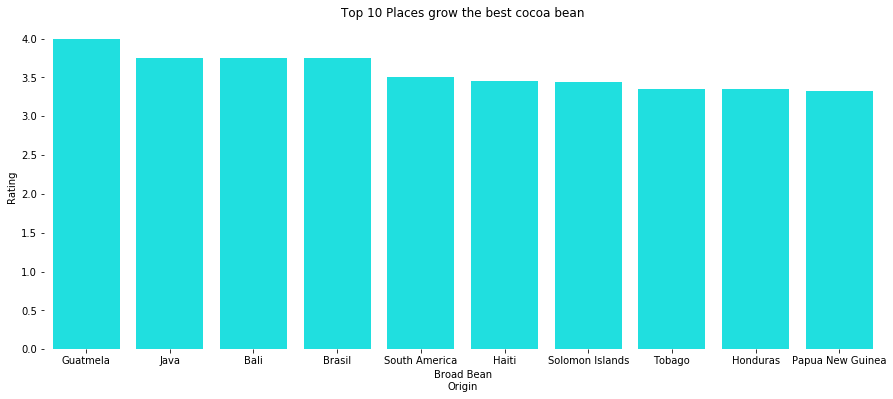

In [49]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='Broad Bean\nOrigin',y="Rating", data=top_grown.head(10), color='cyan')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.title('Top 10 Places grow the best cocoa bean')

Interestingly, places with high quality bean usually distribute over some area. For example in top 10, we can see:
- 6 from South and Central America & some countries in Caribbean: Guatmela, Brasil, South America(of course...), Tobago, Honduras, Haiti
- 2 from Indonesia Islands: Javam Bali
- 2 from Oceania are both offshore islands: Solomon Islands, Papa New Guinea

Text(0.5, 1.0, 'Top 10 Places grow the worst cocoa bean')

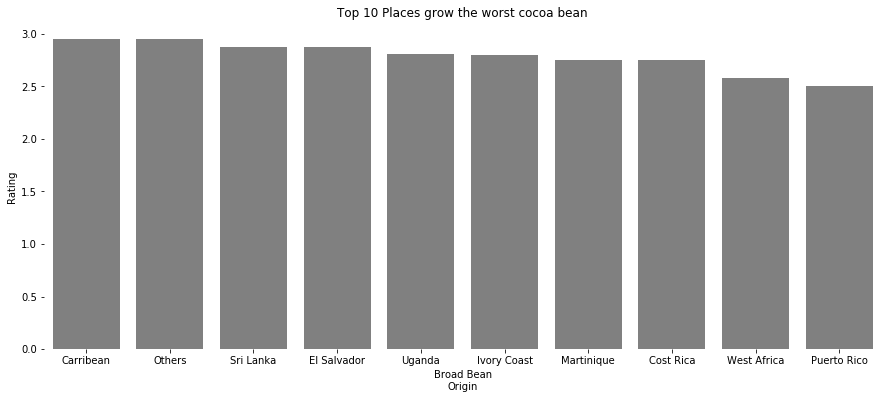

In [50]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='Broad Bean\nOrigin',y="Rating", data=top_grown.tail(10), color='gray')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.title('Top 10 Places grow the worst cocoa bean')

Let's take a look at top 10 places that grow the worst cocoa bean. We can see that they also focus in some area
- 5 from the The Carribean and nearby: Carribbean, El Salvador, Martinique, Costa Rica, Puerto Rico
- 3 From Africa: Uganda, Ivory Coast, West Aftica
- 1 from Asia: Sri Lanka & 1 from Other places

***Popularity***

In [51]:
popular_grown = refactor_df.groupby(by='Broad Bean\nOrigin').count().reset_index().sort_values(by='Rating', ascending=False)
popular_grown

,Broad Bean Origin,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type
60,Venezuela,226,226,226,226,226,226,226,226
17,Ecuador,207,207,207,207,207,207,207,207
43,Peru,175,175,175,175,175,175,175,175
16,Dominican Republic,175,175,175,175,175,175,175,175
34,Madagascar,156,156,156,156,156,156,156,156
40,Others,74,74,74,74,74,74,74,74
38,Nicaragua,61,61,61,61,61,61,61,61
6,Brazil,58,58,58,58,58,58,58,58
4,Bolivia,57,57,57,57,57,57,57,57
3,Belize,50,50,50,50,50,50,50,50


Text(0.5, 1.0, 'Top 10 Popularity places to grow cocoa')

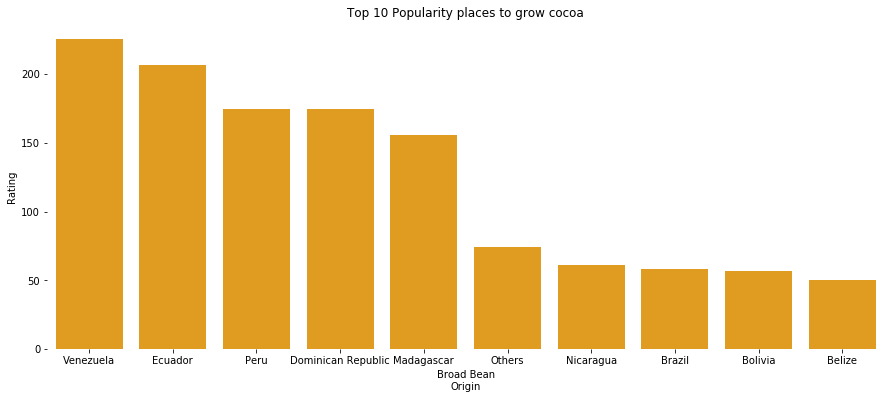

In [52]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='Broad Bean\nOrigin',y="Rating", data=popular_grown.head(10), color='orange')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.title('Top 10 Popularity places to grow cocoa')

- In terms of popularity, south America and the caribbean outweigh others parts of the world with 8 representatives.
- Africa with 1 member: Madagascar
- Top 5 countries are quite large compared to the rest, nearly 3-4 times bigger

Let's check the mean rating of these countries too

In [53]:
popular_places = popular_grown.head(10)['Broad Bean\nOrigin'].to_list()
rating_popular = refactor_df[refactor_df['Broad Bean\nOrigin'].isin(popular_places)].groupby(by='Broad Bean\nOrigin').mean().reset_index()
rating_popular

,Broad Bean Origin,Cocoa Percent,Rating
0,Belize,73.480000,3.245000
1,Bolivia,71.701754,3.197368
2,Brazil,71.137931,3.284483
3,Dominican Republic,71.705714,3.221429
4,Ecuador,73.070048,3.141304
5,Madagascar,71.147436,3.269231
6,Nicaragua,71.754098,3.209016
7,Others,71.270270,2.949324
8,Peru,70.880000,3.160000
9,Venezuela,72.006637,3.242257


Text(0.5, 1.0, 'Top 10 Popularity places Rating')

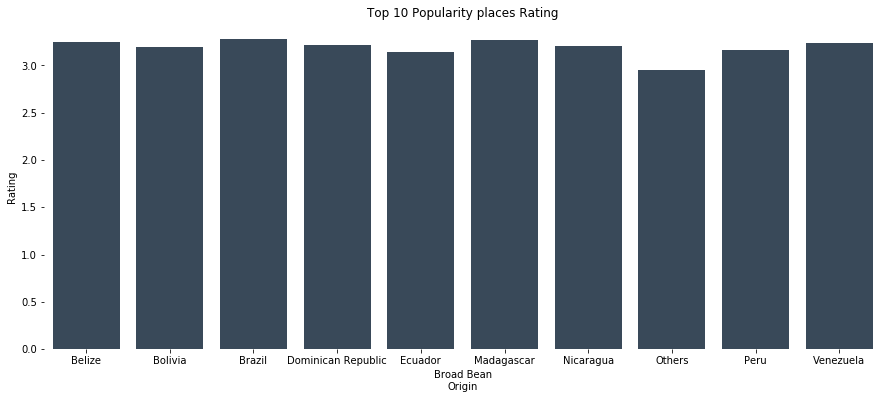

In [54]:
fig, ax = plt.subplots(figsize=(15, 6))
order_id = popular_grown['Broad Bean\nOrigin']
sns.barplot(x="Broad Bean\nOrigin", y="Rating", data=rating_popular, color='#34495e')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.title('Top 10 Popularity places Rating')

Text(0.5, 1.0, 'Rating Distribution of top 10 Popularity')

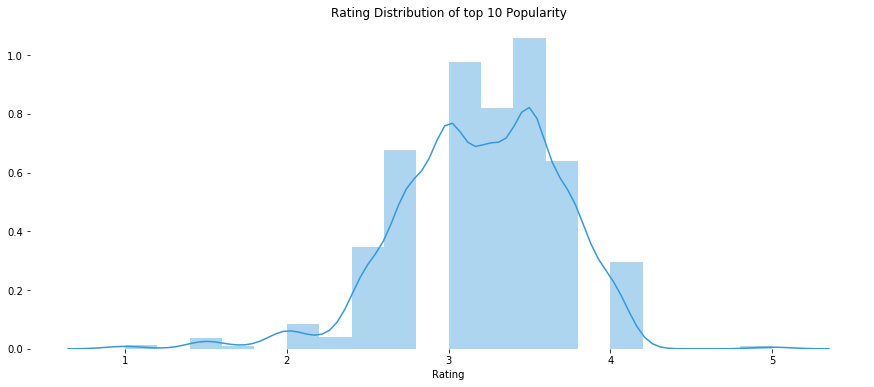

In [55]:
fig, ax = plt.subplots(figsize=(15, 6))
popular_df = refactor_df[refactor_df['Broad Bean\nOrigin'].isin(popular_places)]['Rating']
sns.distplot(popular_df,bins=20, color='#3498db')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.title('Rating Distribution of top 10 Popularity')

Text(0.5, 1.0, 'Top 10 Popularity Cocoa Percent')

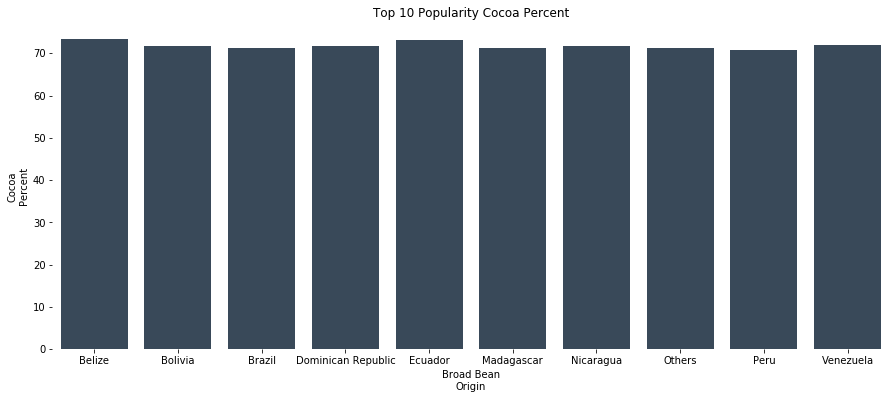

In [56]:
fig, ax = plt.subplots(figsize=(15, 6))
order_id = popular_grown['Broad Bean\nOrigin']
sns.barplot(x="Broad Bean\nOrigin", y='Cocoa\nPercent', data=rating_popular, color='#34495e')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.title('Top 10 Popularity Cocoa Percent')

The Cocoa Percent is around 70%

Text(0.5, 1.0, 'Coao Percent Distribution of top 10 Popularity')

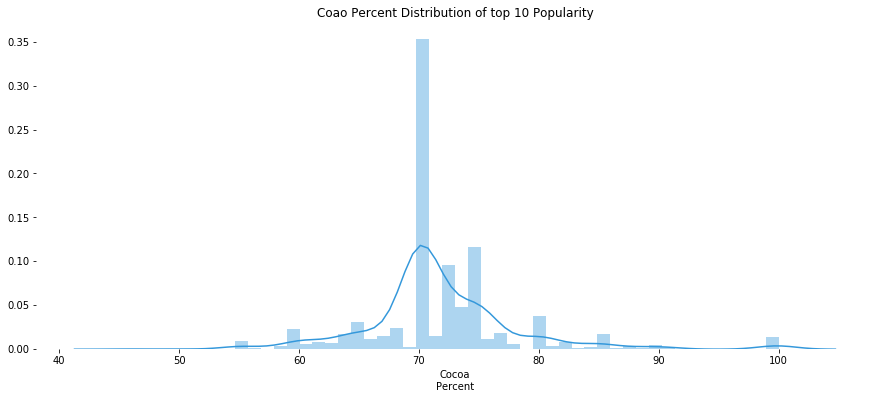

In [57]:
fig, ax = plt.subplots(figsize=(15, 6))
popular_df = refactor_df[refactor_df['Broad Bean\nOrigin'].isin(popular_places)]['Cocoa\nPercent']
sns.distplot(popular_df,bins=50, color='#3498db')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.title('Coao Percent Distribution of top 10 Popularity')

In [58]:
refactor_df.mean()

Cocoa\nPercent    71.704619
Rating             3.191461
dtype: float64

Places with high popularity usually come with average rating, not too high but not too low

**Which countries produce the highest-rated bars?**

In [59]:
top_produce = refactor_df.groupby('Company\nLocation').mean().sort_values(by='Rating', ascending=False).reset_index()
top_produce.head(10)

,Company Location,Cocoa Percent,Rating
0,Chile,70.000000,3.750000
1,Amsterdam,73.250000,3.500000
2,Netherlands,70.000000,3.500000
3,Philippines,65.000000,3.500000
4,Iceland,68.666667,3.416667
5,Vietnam,74.545455,3.409091
6,Brazil,69.823529,3.397059
7,Canada,72.678322,3.384615
8,Poland,71.875000,3.375000
9,Australia,70.211538,3.365385


Wow, VietNam made it here! But let's check if this is because to few ratings or we actually did it or not...

In [60]:
top_produce_count = refactor_df.groupby('Company\nLocation').count().sort_values(by='Rating', ascending=False).reset_index()
top_produce_count.head(10)

,Company Location,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Rating,Bean Type,Broad Bean Origin
0,U.S.A.,784,784,784,784,784,784,784,784
1,France,169,169,169,169,169,169,169,169
2,Canada,143,143,143,143,143,143,143,143
3,U.K.,96,96,96,96,96,96,96,96
4,Italy,66,66,66,66,66,66,66,66
5,Ecuador,54,54,54,54,54,54,54,54
6,Australia,52,52,52,52,52,52,52,52
7,Belgium,40,40,40,40,40,40,40,40
8,Switzerland,38,38,38,38,38,38,38,38
9,Germany,36,36,36,36,36,36,36,36


- Only Australia made it to the second table. So, maybe the high rating score is due to small number of review

In [61]:
top_produce.describe()

,Cocoa Percent,Rating
count,60.000000,60.000000
mean,71.083527,3.134909
std,5.305309,0.258333
min,42.000000,2.500000
25%,70.000000,3.000000
50%,71.517538,3.200000
75%,73.038462,3.308712
max,82.125000,3.750000


In [62]:
top_produce_count.describe()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Rating,Bean Type,Broad Bean Origin
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,31.033333,31.033333,31.033333,31.033333,31.033333,31.033333,31.033333,31.033333
std,103.746753,103.746753,103.746753,103.746753,103.746753,103.746753,103.746753,103.746753
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,6.500000,6.500000,6.500000,6.500000,6.500000,6.500000,6.500000,6.500000
75%,17.750000,17.750000,17.750000,17.750000,17.750000,17.750000,17.750000,17.750000
max,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000


Let's choose some countries which lay above 75% of these 2 categories

In [63]:
top_country_df = refactor_df.groupby('Company\nLocation').mean().reset_index()
top_country_df

,Company Location,Cocoa Percent,Rating
0,Amsterdam,73.250000,3.500000
1,Argentina,73.333333,3.305556
2,Australia,70.211538,3.365385
3,Austria,72.000000,3.240385
4,Belgium,71.650000,3.106250
5,Bolivia,73.000000,3.250000
6,Brazil,69.823529,3.397059
7,Canada,72.678322,3.384615
8,Chile,70.000000,3.750000
9,Colombia,64.461538,3.144231


In [64]:
refactor_df.groupby('Company\nLocation').count().reset_index()

,Company Location,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Rating,Bean Type,Broad Bean Origin
0,Amsterdam,4,4,4,4,4,4,4,4
1,Argentina,9,9,9,9,9,9,9,9
2,Australia,52,52,52,52,52,52,52,52
3,Austria,26,26,26,26,26,26,26,26
4,Belgium,40,40,40,40,40,40,40,40
5,Bolivia,2,2,2,2,2,2,2,2
6,Brazil,17,17,17,17,17,17,17,17
7,Canada,143,143,143,143,143,143,143,143
8,Chile,2,2,2,2,2,2,2,2
9,Colombia,26,26,26,26,26,26,26,26


In [65]:
reviews = refactor_df.groupby('Company\nLocation').count().reset_index()['Rating'].to_list()
top_country_df['reviews'] = reviews
top_country_df

,Company Location,Cocoa Percent,Rating,reviews
0,Amsterdam,73.250000,3.500000,4
1,Argentina,73.333333,3.305556,9
2,Australia,70.211538,3.365385,52
3,Austria,72.000000,3.240385,26
4,Belgium,71.650000,3.106250,40
5,Bolivia,73.000000,3.250000,2
6,Brazil,69.823529,3.397059,17
7,Canada,72.678322,3.384615,143
8,Chile,70.000000,3.750000,2
9,Colombia,64.461538,3.144231,26


In [66]:
top_country_df.loc[(top_country_df['Rating']> 3.3) & (top_country_df['reviews'] > 17)]

,Company Location,Cocoa Percent,Rating,reviews
2,Australia,70.211538,3.365385,52
7,Canada,72.678322,3.384615,143
29,Italy,70.863636,3.318182,66
54,Switzerland,71.210526,3.342105,38


May be a bit to extreme. Let's try with a lower threshold for reviews

In [67]:
elite_df = top_country_df.loc[(top_country_df['Rating']> 3.3) & (top_country_df['reviews'] > 6.5)].sort_values('reviews', ascending=False)
elite_df

,Company Location,Cocoa Percent,Rating,reviews
7,Canada,72.678322,3.384615,143
29,Italy,70.863636,3.318182,66
2,Australia,70.211538,3.365385,52
54,Switzerland,71.210526,3.342105,38
6,Brazil,69.823529,3.397059,17
58,Vietnam,74.545455,3.409091,11
22,Guatemala,70.200000,3.350000,10
46,Scotland,73.000000,3.325000,10
1,Argentina,73.333333,3.305556,9
41,Poland,71.875000,3.375000,8


**Conclusion**
- It seems that Canada is the country that produces the best chocolate bars (based on Rating and number of reviews)
- Although have quite few reviews, Vietnam chocolate bars prove to have good Rating (May be it is the [Marou Chocolate](https://marouchocolate.com/)! It's quite a famous brand in Vietnam in recent years)

In [69]:
refactor_df[refactor_df['Company\nLocation']=="Vietnam"]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
753,Grand Place,"Ben Tre, Dong Nai",741,2011,72.0,Vietnam,3.00,Trinitario,Vietnam
1079,Marou,"Tan Phu Dong Island, Heart of Darkness",1650,2015,85.0,Vietnam,3.25,Trinitario,Vietnam
1080,Marou,Ben Tre,1650,2015,68.0,Vietnam,3.50,Trinitario,Vietnam
1081,Marou,"Dak Lak, Batch 2451",1650,2015,70.0,Vietnam,3.75,Trinitario,Vietnam
1082,Marou,"Tan Phu Dong, Treasure Island",1149,2013,75.0,Vietnam,3.50,Trinitario,Vietnam
1083,Marou,Ba Ria,845,2012,76.0,Vietnam,3.50,Trinitario,Vietnam
1084,Marou,Dong Nai,845,2012,72.0,Vietnam,3.50,Trinitario,Vietnam
1085,Marou,"Tien Giang, Gao Co-op",845,2012,70.0,Vietnam,3.50,Trinitario,Vietnam
1086,Marou,Ben Tre,849,2012,78.0,Vietnam,3.50,Trinitario,Vietnam
1087,Marou,Tien Giang,895,2012,80.0,Vietnam,3.00,Trinitario,Vietnam


Text(0.5, 1.0, 'Top 10 Countries with highest reviews and rating')

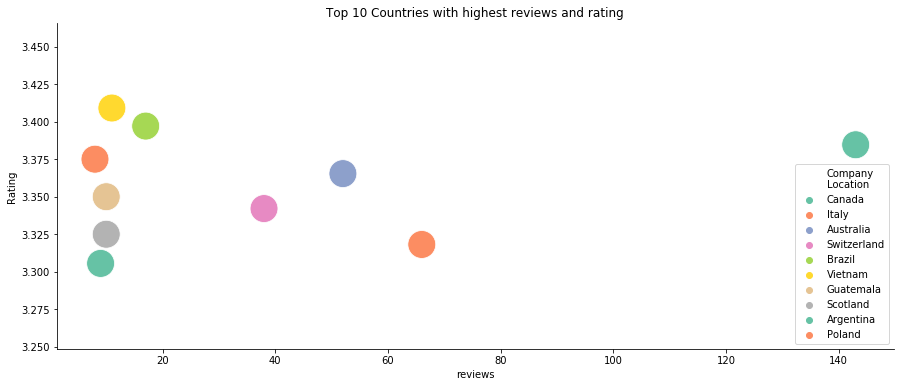

In [150]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
sns.scatterplot(x="reviews",y='Rating',data=elite_df, hue="Company\nLocation", s=777, palette="Set2")
plt.title('Top 10 Countries with highest reviews and rating')

**What’s the relationship between cocoa solids percentage and rating**

<Figure size 432x288 with 0 Axes>

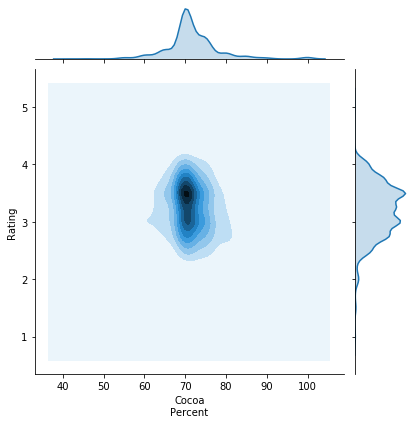

In [131]:
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
sns.jointplot(x="Cocoa\nPercent",y="Rating",data=refactor_df, kind="kde")

From above plot, we can say that: 
- The cacoa percent is mostly aroung 70%
- Even the cacoa percent feom highest raing bars is around this value

In [137]:
def heatMap(df, mirror):
   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots(figsize=(15, 10))
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      #Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
      #Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      #Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
      # Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      # Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
   # show plot
   plt.show()

In [138]:
rating_percent_df = refactor_df[['Rating','Cocoa\nPercent']]

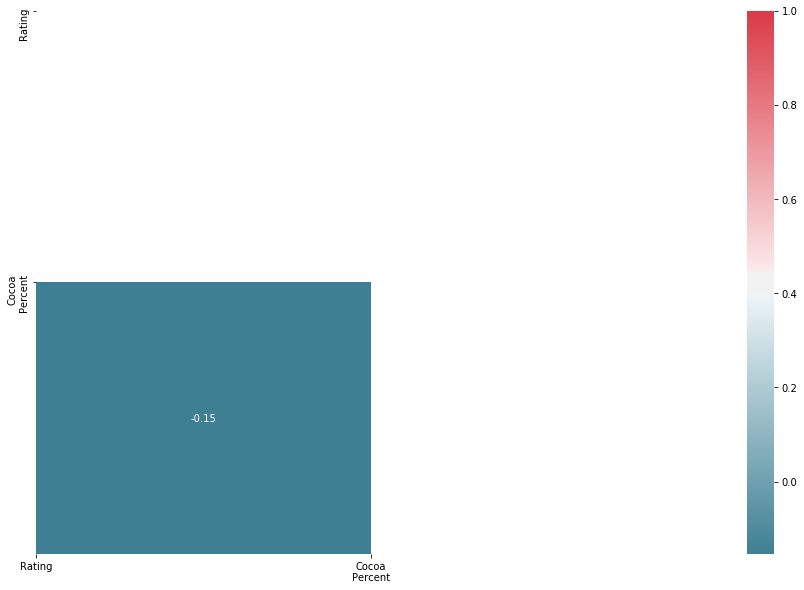

In [139]:
heatMap(rating_percent_df,False)

- From the heatmap, we can tell that Cocoa Percent have very small correlation with Rating
- The corr in seaborn use Pearson. Let's see the Pearson coefficent again using pandas

In [140]:
rating_percent_df['Cocoa\nPercent'].corr(rating_percent_df['Rating'], method="pearson")

-0.15434868973093124

## Google Data Studio

https://datastudio.google.com/s/ip_jsgLXdT8